In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import glob
import soundfile as sf                                                      
import pandas as pd
import scipy
from scipy import signal
import scipy.fftpack
from scipy.fftpack import dct

import librosa as librosa
import python_speech_features

# Cepstral analysis for acoustic vibrations

Human create speech signals through a series of controlled movements of their lungs, vocal cords, tongue, and lips. Speech can be separated into two sound types, voiced and unvoiced. Voiced speech has a roughly regular pattern in its time-frequency structure whereas unvoiced speach does not. 

### Simulate data
An example ilustrate how to obtain the Cepstral coefficients and see what can we infer from them. Each of the coefficients have a different meaning.
We first begin simulating a signal with a simple echo:

$x(t) = s(t) + \alpha*s(t-\tau)$

Sampling frequency of 10,000Hz.

Text(0.5,1,'Impulse response')

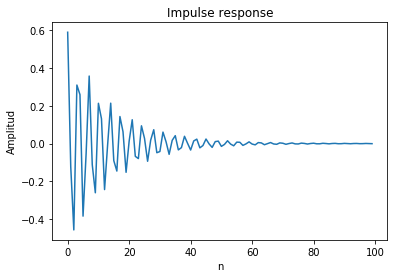

In [146]:
#system_A = ([1, 0.6, 0.1], [1, 0.1, .1])
system_A = ([1, 0.6, 0.1], [1, 0.01, .1])
t, imp_A = signal.impulse(system_A)

plt.plot(imp_A)
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title('Impulse response for signal A')

Text(0.5,1,'Impulse response for signal B')

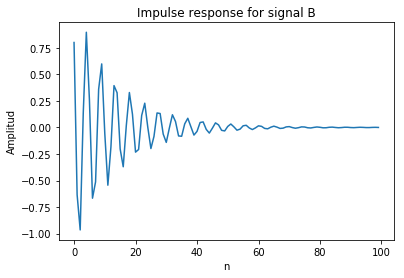

In [145]:
system_B = ([1, 0.9, 0.1], [1, 0.1, .9])
t, imp_B = signal.impulse(system_B)

plt.plot(imp_B)
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title('Impulse response for signal B')

Text(0.5,1,'Pulses at n=50 and n=150')

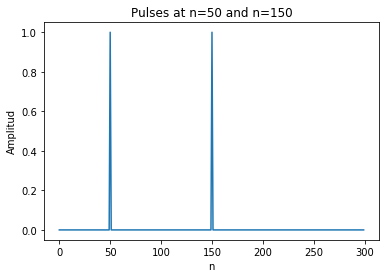

In [149]:
h = np.zeros(300)
T = [50, 150]
h[T] = 1
plt.plot(h)
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title('Pulses at n=50 and n=150')

Text(0.5,1,'Signal')

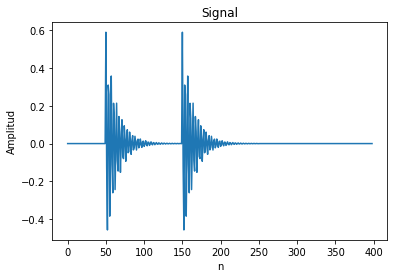

In [150]:
y_A = signal.convolve(imp_A, h)
plt.plot(y_A)
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title('Signal A')

Text(0.5,1,'Signal B')

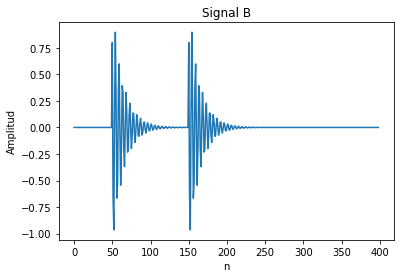

In [132]:
y_B = signal.convolve(imp_B, h)
plt.plot(y_B)
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title('Signal B')

Text(0.5,1,'PSD of signal A')

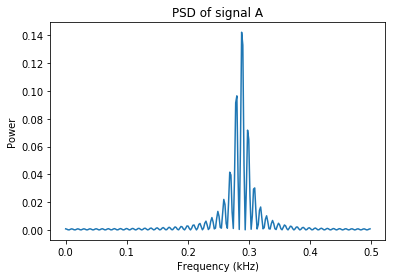

In [133]:
NFFT = 512
Xfft_A = np.absolute(np.fft.rfft(y_A, NFFT))  # Magnitude of the FFT
PSD_A = ((1.0 / NFFT) * ((Xfft_A) ** 2))  # Power Spectrum

plt.plot(np.arange(0, 0.5, 1/257/2), np.transpose(PSD_A))
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power')
plt.title('PSD of signal A')

Text(0.5,1,'PSD of signal B')

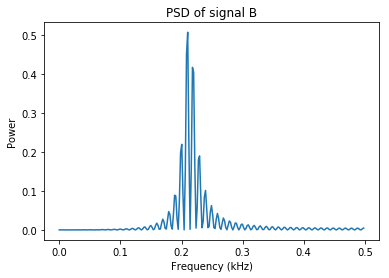

In [134]:
Xfft_B = np.absolute(np.fft.rfft(y_B, NFFT))  # Magnitude of the FFT
PSD_B = ((1.0 / NFFT) * ((Xfft_B) ** 2))  # Power Spectrum

plt.plot(np.arange(0, 0.5, 1/257/2), np.transpose(PSD_B))
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power')
plt.title('PSD of signal B')

### Cepstral Analysis
A common technique used for speech (and sound) analysis is Cepstral analysis. For discrete-time signals, the cepstrum is defined as the inverse discrete-time Fourier Transform of the natural logarithm of the discrete-time Fourier Transform of the signal.
We will extract a 20ms segment of the signal. In practice it is common to work with segments no longer than 25ms. The stationary assumptions are met for segments of this length. The cepstrum is computed for this 25ms segment as: 

$c[n] = \int_{-1/2}^{1/2}\log{\left|X(f)\right|e^{i2\pi fn}df}$

Text(0.5,1,'Cepstrum of signal A')

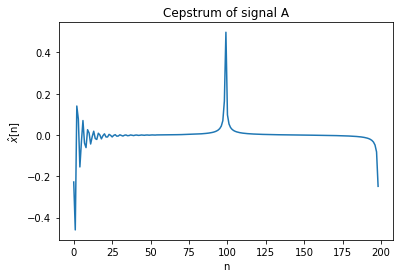

In [135]:
ceps_A = np.fft.ifft(np.log(np.absolute(np.fft.fft(y_A)) )).real

plt.plot(ceps_A[1:200])
plt.xlabel('n')
plt.ylabel('$\hat{x}$[n]')
plt.title('Cepstrum of signal A')

Text(0.5,1,'Cepstrum of signal B')

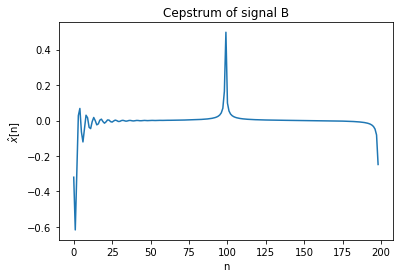

In [136]:
ceps_B = np.fft.ifft(np.log(np.absolute(np.fft.fft(y_B)) )).real

plt.plot(ceps_B[1:200])
plt.xlabel('n')
plt.ylabel('$\hat{x}$[n]')
plt.title('Cepstrum of signal B')

In the same way as the PSD, the cepstrum is symmetric. The first coefficient corresponds to an impulse and in most cases is ignored. In practice it is common to use the first 20-25 coefficients. Although it is also common to use just the first 13 coefficients.

(-0.7, 0.5)

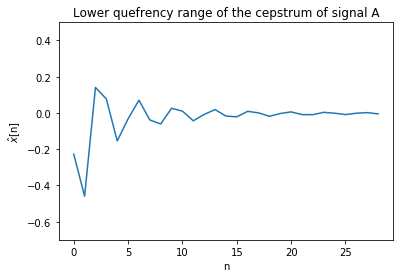

In [137]:
plt.plot(ceps_A[1:30])
plt.xlabel('n')
plt.ylabel('$\hat{x}$[n]')
plt.title('Lower quefrency range of the cepstrum of signal A')
plt.ylim(-0.7, 0.5)

(-0.7, 0.5)

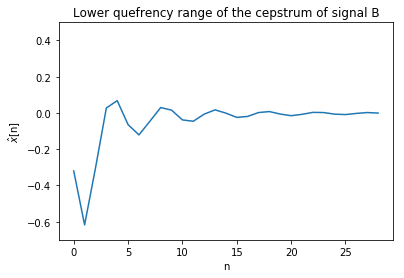

In [138]:
plt.plot(ceps_B[1:30])
plt.xlabel('n')
plt.ylabel('$\hat{x}$[n]')
plt.title('Lower quefrency range of the cepstrum of signal B')
plt.ylim(-0.7, 0.5)

These coefficients are the ones that can be used to differentiate between two signals. We can think of them as a compressed representation of the envelope of the PSD. By taking the inverse of the exponential of the real part of the cepstrum we will obtain a reconstruction of the impulse response from the original signal.

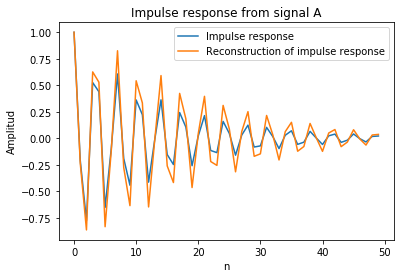

In [139]:
nc = 100
CCs_low_A = ceps_A[0:nc]/np.max(ceps_A[0:nc])
imp_A_hat = np.fft.ifft(np.exp(np.real(np.fft.fft(CCs_low_A, NFFT))))
imp_A_hat = imp_A_hat[0:nc]/np.max(imp_A_hat[0:nc])

plt.plot(imp_A[0:50]/np.max(imp_A[0:50]))
plt.plot(imp_A_hat[0:50])
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title('Impulse response from signal A')
plt.gca().legend(('Impulse response','Reconstruction of impulse response'))

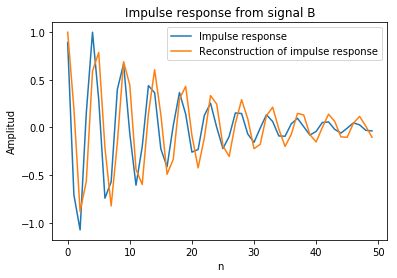

In [140]:
CCs_low_B = ceps_B[0:nc]/np.max(ceps_B[0:nc])
imp_B_hat = np.fft.ifft(np.exp(np.real(np.fft.fft(CCs_low_B, NFFT))))
imp_B_hat = imp_B_hat[0:nc]/np.max(imp_B_hat[0:nc])

plt.plot(imp_B[0:50]/np.max(imp_B[0:50]))
plt.plot(imp_B_hat[0:50])
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.title('Impulse response from signal B')
plt.gca().legend(('Impulse response','Reconstruction of impulse response'))


This impulse response contains information about the envelope of the PSD. The pulses from the original signal correspond to the rapid oscillations in the PSD.

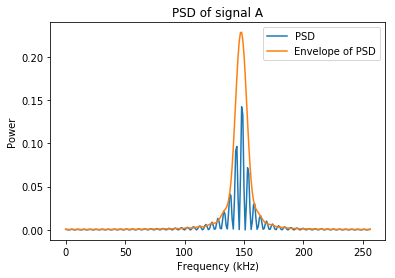

In [141]:
Xfft_A_hat = np.absolute(np.fft.rfft(imp_A_hat[0:50], NFFT))  # Magnitude of the FFT
PSD_A_hat = ((1.0 / NFFT) * ((Xfft_A_hat) ** 2))  # Power Spectrum

plt.plot(np.transpose(PSD_A))
plt.plot(np.transpose(PSD_A_hat))
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power')
plt.title('PSD of signal A')
plt.gca().legend(('PSD','Envelope of PSD'))

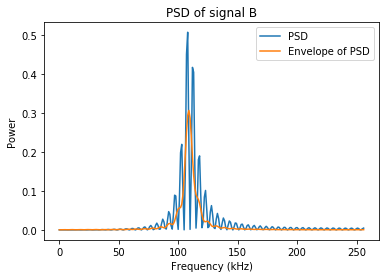

In [142]:
Xfft_B_hat = np.absolute(np.fft.rfft(imp_B_hat[0:75], NFFT))  # Magnitude of the FFT
PSD_B_hat = ((1.0 / NFFT) * ((Xfft_B_hat) ** 2))  # Power Spectrum

plt.plot(np.transpose(PSD_B))
plt.plot(np.transpose(PSD_B_hat))
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power')
plt.title('PSD of signal B')
plt.gca().legend(('PSD','Envelope of PSD'))